In [1]:
import itertools
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Step 1: Define probabilities and odds for each match
matches = [
    {'team': 'Fehérvár vs Omonia Nicosia', 'win': 0.33, 'draw': 0.30, 'loss': 0.37, 'win_odds': 2.85, 'draw_odds': 3.33, 'loss_odds': 2.50},
    {'team': 'Rigas FS vs UE Santa Coloma', 'win': 0.65, 'draw': 0.20, 'loss': 0.15, 'win_odds': 1.55, 'draw_odds': 4.00, 'loss_odds': 6.50},
    {'team': 'Fredrikstad vs Haugesund', 'win': 0.47, 'draw': 0.29, 'loss': 0.24, 'win_odds': 2.13, 'draw_odds': 3.45, 'loss_odds': 3.90},
    {'team': 'Hull City vs Sheffield Wednesday', 'win': 0.44, 'draw': 0.31, 'loss': 0.25, 'win_odds': 2.30, 'draw_odds': 3.23, 'loss_odds': 3.70},
    {'team': 'Plymouth Argyle vs Cheltenham Town', 'win': 0.63, 'draw': 0.25, 'loss': 0.12, 'win_odds': 1.58, 'draw_odds': 3.75, 'loss_odds': 7.00},
    {'team': 'Real Madrid vs Atalanta', 'win': 0.65, 'draw': 0.21, 'loss': 0.14, 'win_odds': 1.54, 'draw_odds': 4.10, 'loss_odds': 6.00},
    {'team': 'Leeds United vs Middlesbrough', 'win': 0.53, 'draw': 0.27, 'loss': 0.20, 'win_odds': 1.88, 'draw_odds': 3.70, 'loss_odds': 4.80},
]


In [5]:
# Step 2: Generate all possible combinations of outcomes (win, draw, loss)
outcomes = ['win', 'draw', 'loss']
combinations = list(itertools.product(outcomes, repeat=len(matches)))

In [7]:
# Step 3: Calculate total probability, total odds, and expected value for each combination
results = []
for combo in combinations:
    total_prob = 1.0
    total_odds = 1.0
    for i, outcome in enumerate(combo):
        match = matches[i]
        total_prob *= match[outcome]
        total_odds *= match[f'{outcome}_odds']
    # Calculate the expected value for the combination
    expected_value = (total_prob * total_odds) - (1 - total_prob)
    results.append((combo, total_prob, total_odds, expected_value))

In [123]:
results 

[(('win', 'win', 'win', 'win', 'win', 'win', 'win'),
  0.009627368751,
  98.99645764932,
  -0.03729722841624161),
 (('win', 'win', 'win', 'win', 'win', 'win', 'draw'),
  0.004904508609000001,
  194.8334538843,
  -0.03953313949424586),
 (('win', 'win', 'win', 'win', 'win', 'win', 'loss'),
  0.00363296934,
  252.7569131472,
  -0.07810891472317938),
 (('win', 'win', 'win', 'win', 'win', 'draw', 'win'),
  0.0031103806734,
  263.5619976378,
  -0.17711147563129037),
 (('win', 'win', 'win', 'win', 'win', 'draw', 'draw'),
  0.0015845335506,
  518.7124421595,
  -0.1764981987340103),
 (('win', 'win', 'win', 'win', 'win', 'draw', 'loss'),
  0.0011737285560000001,
  672.924249288,
  -0.20899586402981163),
 (('win', 'win', 'win', 'win', 'win', 'loss', 'win'),
  0.0020735871156000005,
  385.70048434800003,
  -0.19814285805970744),
 (('win', 'win', 'win', 'win', 'win', 'loss', 'draw'),
  0.0010563557004000003,
  759.0913787700001,
  -0.19707313921141467),
 (('win', 'win', 'win', 'win', 'win', 'loss',

In [43]:
# Step 4: Convert results to DataFrame for easier analysis
df = pd.DataFrame(results, columns=['Combination', 'Total Probability', 'Total Odds', 'Expected Value'])
len(df)

2187

In [45]:
df


,Combination,Total Probability,Total Odds,Expected Value
0,"(win, win, win, win, win, win, win)",0.009627,98.996458,-0.037297
1,"(win, win, win, win, win, win, draw)",0.004905,194.833454,-0.039533
2,"(win, win, win, win, win, win, loss)",0.003633,252.756913,-0.078109
3,"(win, win, win, win, win, draw, win)",0.003110,263.561998,-0.177111
4,"(win, win, win, win, win, draw, draw)",0.001585,518.712442,-0.176498
...,...,...,...,...
2182,"(loss, loss, loss, loss, loss, draw, draw)",0.000023,24900.227625,-0.435805
2183,"(loss, loss, loss, loss, loss, draw, loss)",0.000017,32302.998000,-0.457836
2184,"(loss, loss, loss, loss, loss, loss, win)",0.000030,18515.133000,-0.450991
2185,"(loss, loss, loss, loss, loss, loss, draw)",0.000015,36439.357500,-0.449573


In [59]:
# Step 5: Filter combinations with a positive expected value
positive_ev_bets = df[df['Expected Value'] > df['Expected Value'].quantile(0.50) ]
positive_ev_bets

,Combination,Total Probability,Total Odds,Expected Value
0,"(win, win, win, win, win, win, win)",0.009627,98.996458,-0.037297
1,"(win, win, win, win, win, win, draw)",0.004905,194.833454,-0.039533
2,"(win, win, win, win, win, win, loss)",0.003633,252.756913,-0.078109
3,"(win, win, win, win, win, draw, win)",0.003110,263.561998,-0.177111
4,"(win, win, win, win, win, draw, draw)",0.001585,518.712442,-0.176498
...,...,...,...,...
2161,"(loss, loss, loss, loss, win, win, draw)",0.000368,2111.053445,-0.222381
2162,"(loss, loss, loss, loss, win, win, loss)",0.000273,2738.663928,-0.252820
2169,"(loss, loss, loss, loss, draw, win, win)",0.000287,2545.830788,-0.269578
2170,"(loss, loss, loss, loss, draw, win, draw)",0.000146,5010.411656,-0.267814


In [51]:
# Step 6: Sort by Expected Value, then by Total Probability, then by Total Odds
sorted_bets = positive_ev_bets.sort_values(by=['Total Probability'], ascending=[False])

In [69]:
sorted_bets.head(25)

,Combination,Total Probability,Total Odds,Expected Value
1458,"(loss, win, win, win, win, win, win)",0.010794,86.838998,-0.051838
0,"(win, win, win, win, win, win, win)",0.009627,98.996458,-0.037297
729,"(draw, win, win, win, win, win, win)",0.008752,115.669545,0.021110
1485,"(loss, win, win, draw, win, win, win)",0.007605,121.952158,-0.064938
27,"(win, win, win, draw, win, win, win)",0.006783,139.025460,-0.050219
1539,"(loss, win, draw, win, win, win, win)",0.006660,140.654715,-0.056533
756,"(draw, win, win, draw, win, win, win)",0.006166,162.440274,0.007820
1512,"(loss, win, win, loss, win, win, win)",0.006133,139.697518,-0.137083
81,"(win, win, draw, win, win, win, win)",0.005940,160.346375,-0.041556
1620,"(loss, win, loss, win, win, win, win)",0.005512,159.000982,-0.118075


In [73]:
# Step 6: Sort by Expected Value, then by Total Probability, then by Total Odds
sorted_bets = positive_ev_bets.sort_values(by=['Expected Value', 'Total Probability', 'Total Odds'], ascending=[False, False, False])
sorted_bets

,Combination,Total Probability,Total Odds,Expected Value
729,"(draw, win, win, win, win, win, win)",0.008752,115.669545,0.021110
730,"(draw, win, win, win, win, win, draw)",0.004459,227.647509,0.019458
810,"(draw, win, draw, win, win, win, win)",0.005400,187.352080,0.017151
811,"(draw, win, draw, win, win, win, draw)",0.002751,368.724839,0.017142
756,"(draw, win, win, draw, win, win, win)",0.006166,162.440274,0.007820
...,...,...,...,...
976,"(draw, draw, win, win, win, draw, draw)",0.000443,1564.063323,-0.306323
379,"(win, draw, draw, loss, win, win, draw)",0.000529,1310.102280,-0.306357
1117,"(draw, draw, draw, loss, draw, win, draw)",0.000191,3633.111752,-0.306407
1320,"(draw, loss, draw, win, loss, loss, win)",0.000051,13561.622802,-0.306587


In [77]:
# Step 7: Select the top 10 bets (adjust the number based on your preference)
top_bets = sorted_bets.head(10)
top_bets

,Combination,Total Probability,Total Odds,Expected Value
729,"(draw, win, win, win, win, win, win)",0.008752,115.669545,0.021110
730,"(draw, win, win, win, win, win, draw)",0.004459,227.647509,0.019458
810,"(draw, win, draw, win, win, win, win)",0.005400,187.352080,0.017151
811,"(draw, win, draw, win, win, win, draw)",0.002751,368.724839,0.017142
756,"(draw, win, win, draw, win, win, win)",0.006166,162.440274,0.007820
757,"(draw, win, win, draw, win, win, draw)",0.003141,319.696285,0.007409
838,"(draw, win, draw, draw, win, win, draw)",0.001938,517.817926,0.005604
837,"(draw, win, draw, draw, win, win, win)",0.003805,263.107487,0.004858
1216,"(draw, loss, win, win, win, win, draw)",0.001029,954.650845,-0.016714
1297,"(draw, loss, draw, win, win, win, draw)",0.000635,1546.265454,-0.017697


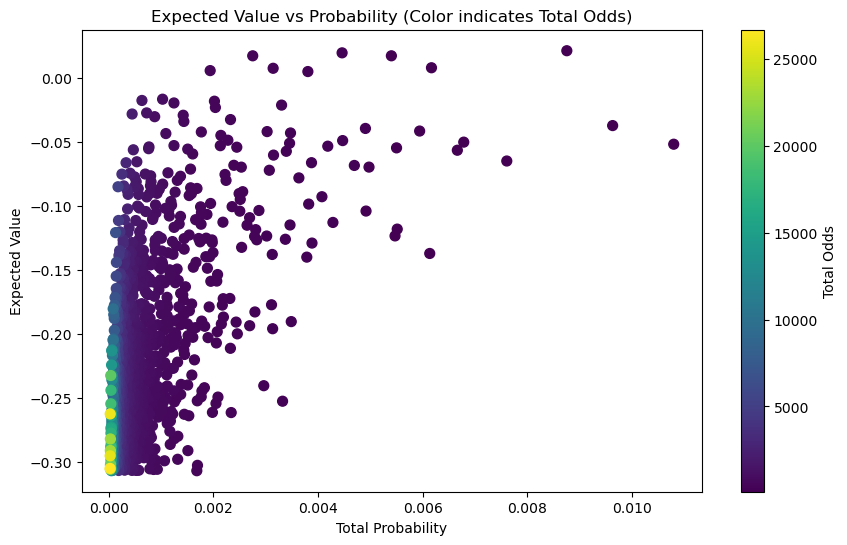

In [57]:
# Step 8: Visualize the relationship between expected value, probability, and odds
plt.figure(figsize=(10, 6))
plt.scatter(sorted_bets['Total Probability'], sorted_bets['Expected Value'], c=sorted_bets['Total Odds'], cmap='viridis', s=50)
plt.colorbar(label='Total Odds')
plt.xlabel('Total Probability')
plt.ylabel('Expected Value')
plt.title('Expected Value vs Probability (Color indicates Total Odds)')
plt.show()

                                    Combination  Total Probability  \
1324   (draw, loss, draw, draw, win, win, draw)           0.000447   
1298    (draw, loss, draw, win, win, win, loss)           0.000470   
1244    (draw, loss, win, draw, win, win, loss)           0.000537   
1325   (draw, loss, draw, draw, win, win, loss)           0.000331   
1225    (draw, loss, win, win, draw, win, draw)           0.000408   
1306   (draw, loss, draw, win, draw, win, draw)           0.000252   
1305    (draw, loss, draw, win, draw, win, win)           0.000495   
1378    (draw, loss, loss, win, win, win, draw)           0.000525   
1252   (draw, loss, win, draw, draw, win, draw)           0.000288   
1333  (draw, loss, draw, draw, draw, win, draw)           0.000177   

       Total Odds  Expected Value  
1324  2171.494529       -0.028263  
1298  2005.965994       -0.056185  
1244  1739.236981       -0.065532  
1325  2817.073983       -0.066298  
1225  2265.785234       -0.074470  
1306  3669.93

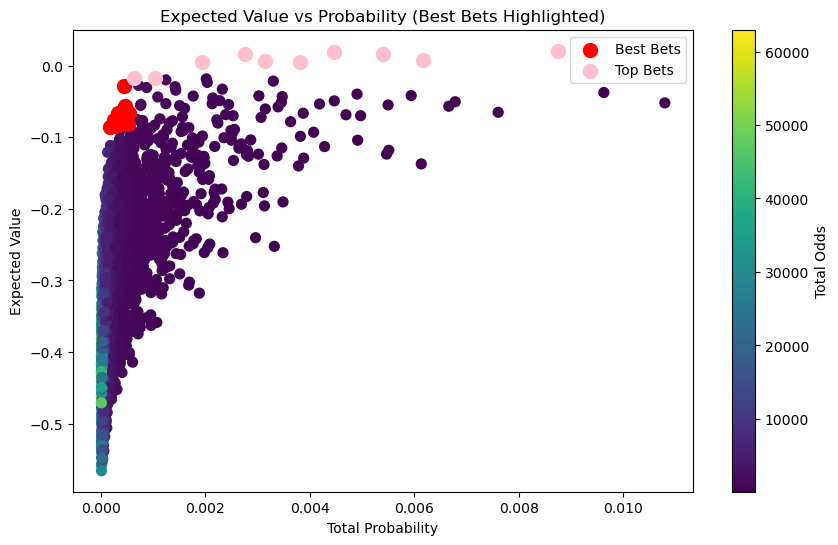

In [83]:
import numpy as np

# Define thresholds for high expected value, reasonable probability, and balanced odds
expected_value_threshold = df['Expected Value'].quantile(0.85)  # Top 25% for expected value
probability_threshold_min = df['Total Probability'].quantile(0.45)  # Above the 25th percentile for probability
probability_threshold_max = df['Total Probability'].quantile(0.90)  # Below the 75th percentile for probability
odds_threshold_min = df['Total Odds'].quantile(0.25)  # Avoid very high odds, which might be too risky

# Apply filtering based on the criteria
filtered_bets = df[
    (df['Expected Value'] >= expected_value_threshold) &
    (df['Total Probability'] >= probability_threshold_min) &
    (df['Total Probability'] <= probability_threshold_max) &
    (df['Total Odds'] >= odds_threshold_min)
]

# Sort by Expected Value in descending order to get the best bets at the top
best_bets = filtered_bets.sort_values(by='Expected Value', ascending=False)

# Display the top 10 best bets based on these criteria
top_bets_based_on_criteria = best_bets.head(10)
print(top_bets_based_on_criteria)

# Optionally, you could visualize these on the graph
plt.figure(figsize=(10, 6))
plt.scatter(df['Total Probability'], df['Expected Value'], c=df['Total Odds'], cmap='viridis', s=50)
plt.colorbar(label='Total Odds')
plt.xlabel('Total Probability')
plt.ylabel('Expected Value')
plt.title('Expected Value vs Probability (Best Bets Highlighted)')
plt.scatter(
    top_bets_based_on_criteria['Total Probability'],
    top_bets_based_on_criteria['Expected Value'],
    color='red', s=100, label='Best Bets'
)
plt.scatter(
    top_bets['Total Probability'],
    top_bets['Expected Value'],
    color='pink', s=100, label='Top Bets'
)
plt.legend()
plt.show()


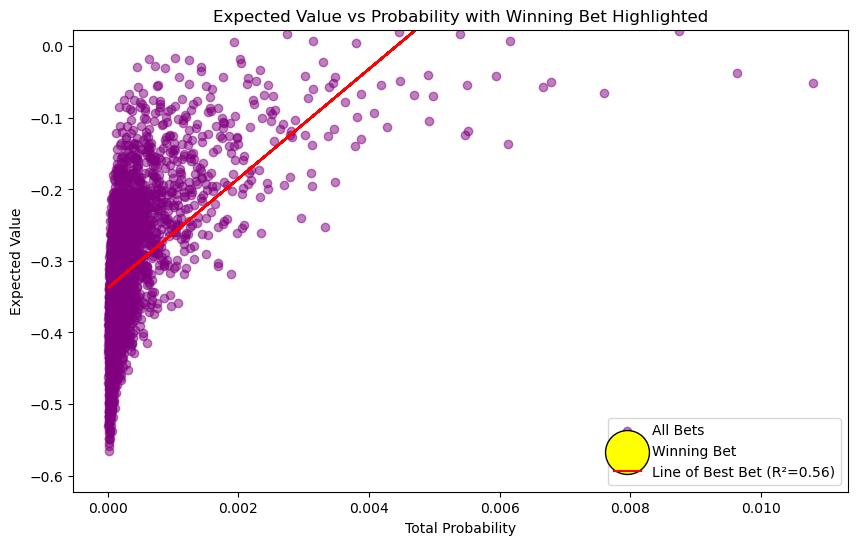

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Assuming df is your DataFrame containing all combinations data

# Define the Total Probability and Expected Value for the winning bet
winning_total_probability = 0.002314
winning_expected_value = -0.172201

# Add a column to identify if a row matches the winning bet based on probability and expected value
df['is_winning_bet'] = (df['Total Probability'] == winning_total_probability) & \
                                    (df['Expected Value'] == winning_expected_value)

# Define the x and y variables for regression
x = df['Total Probability'].values
y = df['Expected Value'].values

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# Calculate the regression line
best_bet_line = slope * x + intercept

# Plot the data
plt.figure(figsize=(10, 6))

# Plot all bets with default color
plt.scatter(x[~df['is_winning_bet']], y[~df['is_winning_bet']], 
            c='purple', alpha=0.5, label="All Bets")

# Highlight the winning bet in blue
plt.scatter(x[df['is_winning_bet']], y[df['is_winning_bet']], 
            c='yellow', s=1000, label="Winning Bet", edgecolor='black', zorder=5)

# Plot the regression line
plt.plot(x, best_bet_line, color='red', label=f"Line of Best Bet (R²={r_value:.2f})")

# Set plot limits to ensure negative values are shown
plt.ylim(min(y) * 1.1, max(y) * 1.1)

# Set plot labels and title
plt.xlabel('Total Probability')
plt.ylabel('Expected Value')
plt.title('Expected Value vs Probability with Winning Bet Highlighted')
plt.legend()
plt.show()


In [187]:
# Step 9: Backtest Against Actual Results

actual_results = {
    "Fehérvár vs Omonia Nicosia": "loss",
    "Rigas FS vs UE Santa Coloma": "win",
    "Fredrikstad vs Haugesund": "win",
    "Hull City vs Sheffield Wednesday": "loss",
    "Plymouth Argyle vs Cheltenham Town": "win",
    "Real Madrid vs Atalanta": "win",
    "Leeds United vs Middlesbrough": "loss"
}


In [189]:
# Step 10: Filter combinations to match actual results
filtered_combinations = []
matching_row_indices = []

for idx, (combo, prob, odds, ev) in enumerate(sorted_bets.itertuples(index=False)):
    matches_actual_results = True
    for i, outcome in enumerate(combo):
        match_name = matches[i]['team']
        if outcome != actual_results[match_name]:
            matches_actual_results = False
            break
    
    if matches_actual_results:
        filtered_combinations.append((combo, prob, odds, ev))
        matching_row_indices.append(idx)

In [191]:
# Step 11: Display the matching rows if they exist
if matching_row_indices:
    matching_rows = sorted_bets.iloc[matching_row_indices]
else:
    matching_rows = None

In [193]:
matching_rows

,Combination,Total Probability,Total Odds,Expected Value
1514,"(loss, win, win, loss, win, win, loss)",0.002314,356.674515,-0.172201


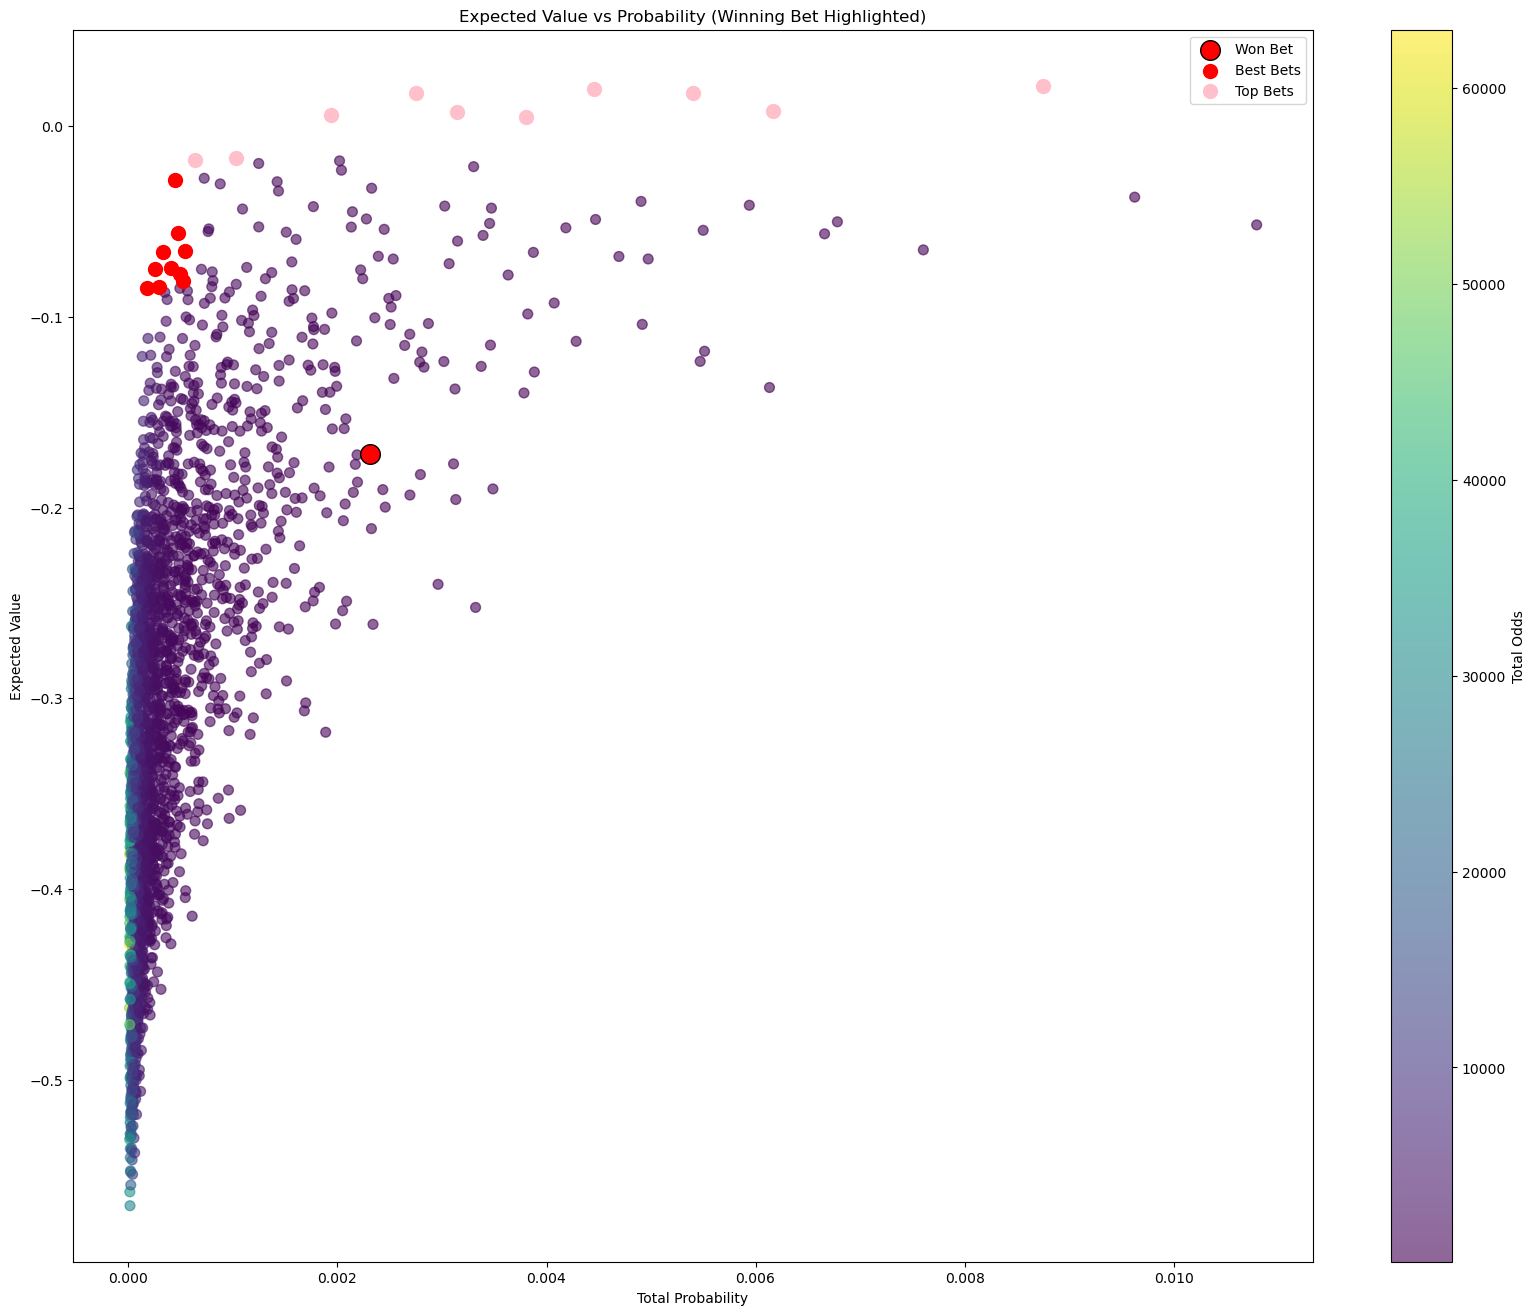

In [195]:
import matplotlib.pyplot as plt

# Assuming 'matching_rows' is the DataFrame with your matching bet
# Extract the 'Total Probability', 'Total Odds', and 'Expected Value' for the winning combination
won_bet = matching_rows.iloc[0]  # Assuming there is only one matching row

# Plot the existing scatter plot
plt.figure(figsize=(20, 16))
plt.scatter(df['Total Probability'], df['Expected Value'], c=df['Total Odds'], cmap='viridis', s=50, alpha=0.6)
plt.colorbar(label='Total Odds')
plt.xlabel('Total Probability')
plt.ylabel('Expected Value')
plt.title('Expected Value vs Probability (Winning Bet Highlighted)')

# Highlight the winning bet
plt.scatter(won_bet['Total Probability'], won_bet['Expected Value'], color='red', s=200, edgecolor='black', label='Won Bet')
plt.scatter(
    top_bets_based_on_criteria['Total Probability'],
    top_bets_based_on_criteria['Expected Value'],
    color='red', s=100, label='Best Bets'
)
plt.scatter(
    top_bets['Total Probability'],
    top_bets['Expected Value'],
    color='pink', s=100, label='Top Bets'
)
plt.legend()
plt.savefig('//Users/user/Downloads/xpected_value_vs_probability.jpeg')
plt.show()



In [201]:
df

,Combination,Total Probability,Total Odds,Expected Value,is_winning_bet
0,"(win, win, win, win, win, win, win)",0.009627,98.996458,-0.037297,False
1,"(win, win, win, win, win, win, draw)",0.004905,194.833454,-0.039533,False
2,"(win, win, win, win, win, win, loss)",0.003633,252.756913,-0.078109,False
3,"(win, win, win, win, win, draw, win)",0.003110,263.561998,-0.177111,False
4,"(win, win, win, win, win, draw, draw)",0.001585,518.712442,-0.176498,False
...,...,...,...,...,...
2182,"(loss, loss, loss, loss, loss, draw, draw)",0.000023,24900.227625,-0.435805,False
2183,"(loss, loss, loss, loss, loss, draw, loss)",0.000017,32302.998000,-0.457836,False
2184,"(loss, loss, loss, loss, loss, loss, win)",0.000030,18515.133000,-0.450991,False
2185,"(loss, loss, loss, loss, loss, loss, draw)",0.000015,36439.357500,-0.449573,False


Cross-validated MSE: 0.006688832982826506


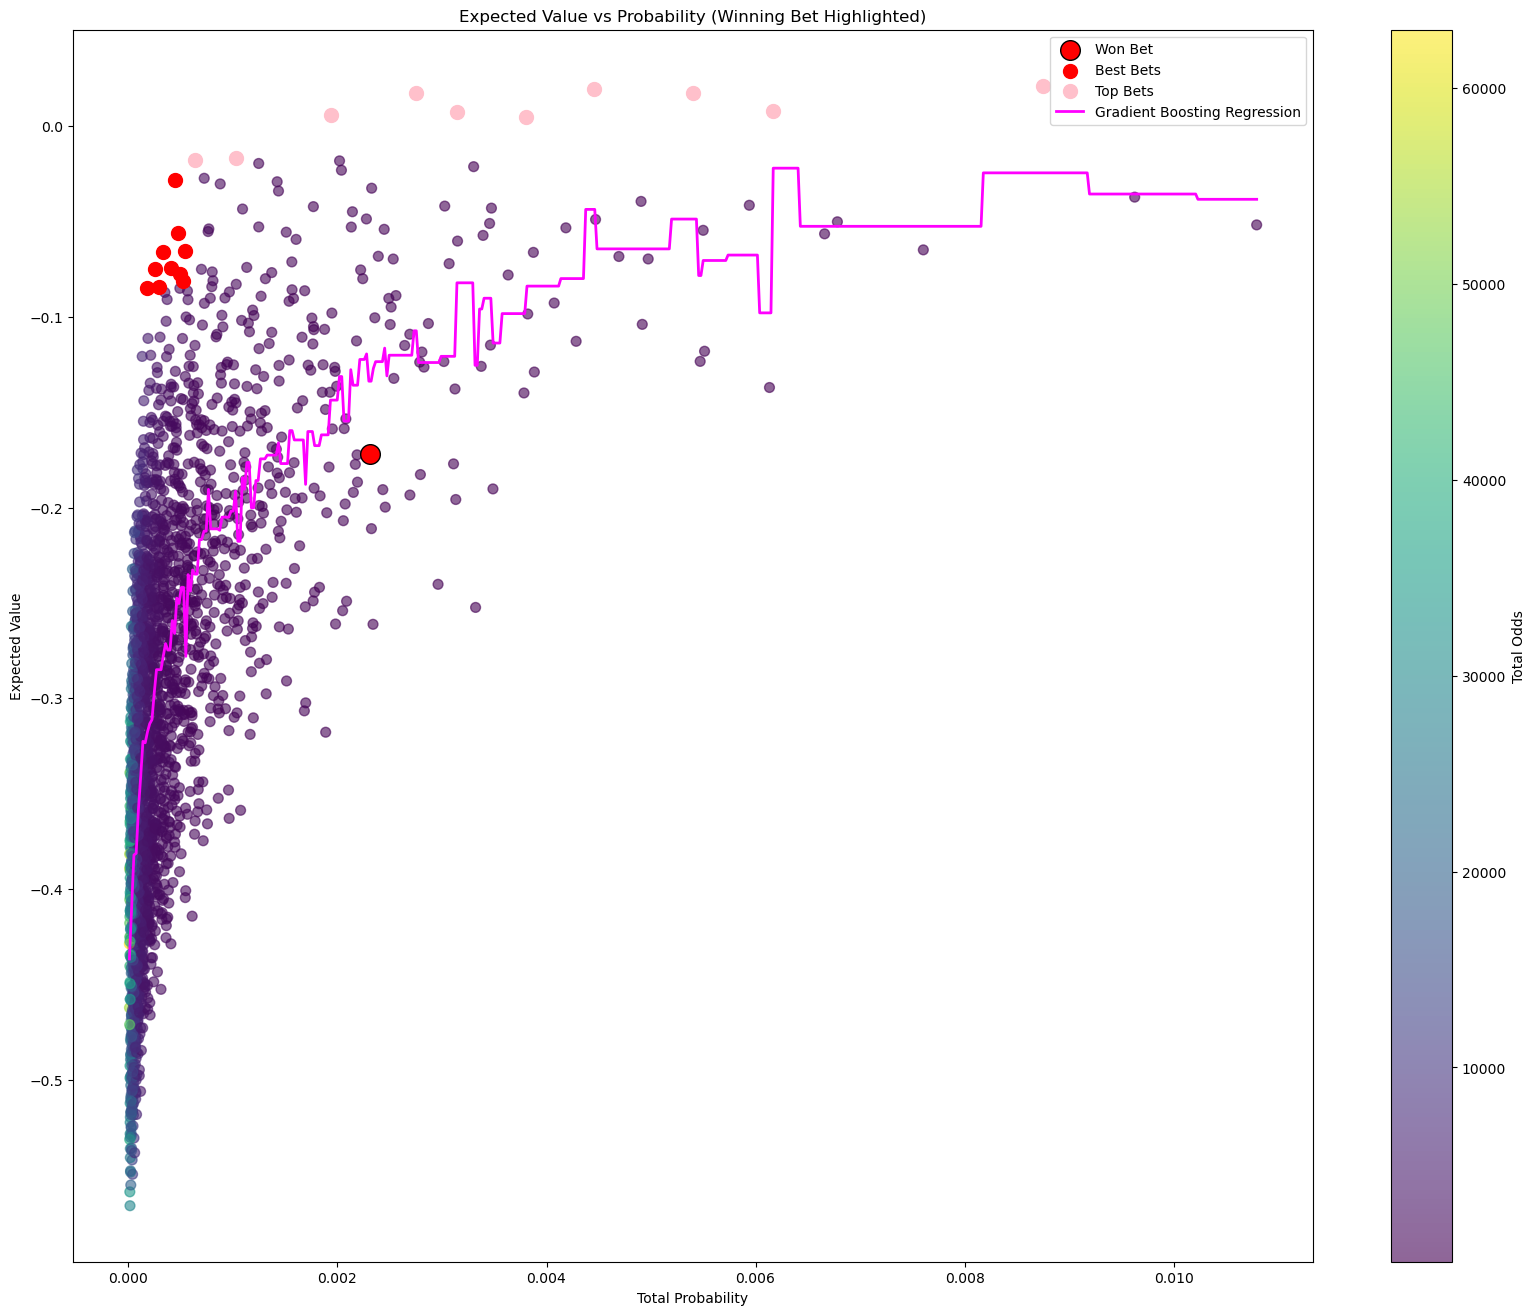

In [231]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

# Assuming 'df' is the DataFrame with your data

# Define the x and y variables
x = df['Total Probability'].values
y = df['Expected Value'].values

# 1. Gradient Boosting Regression
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(x.reshape(-1, 1), y)

# Predict using the Gradient Boosting model
x_new = np.linspace(x.min(), x.max(), 500)
y_gb = gb_model.predict(x_new.reshape(-1, 1))

# Perform cross-validation to assess the model's performance
scores = cross_val_score(gb_model, x.reshape(-1, 1), y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validated MSE: {-scores.mean()}")

# Plot the existing scatter plot with all elements
plt.figure(figsize=(20, 16))
plt.scatter(df['Total Probability'], df['Expected Value'], c=df['Total Odds'], cmap='viridis', s=50, alpha=0.6)
plt.colorbar(label='Total Odds')
plt.xlabel('Total Probability')
plt.ylabel('Expected Value')
plt.title('Expected Value vs Probability (Winning Bet Highlighted)')

# Highlight the winning bet
plt.scatter(won_bet['Total Probability'], won_bet['Expected Value'], color='red', s=200, edgecolor='black', label='Won Bet')

# Plot the "Best Bets" and "Top Bets" as before
plt.scatter(top_bets_based_on_criteria['Total Probability'], top_bets_based_on_criteria['Expected Value'], 
            color='red', s=100, label='Best Bets')
plt.scatter(top_bets['Total Probability'], top_bets['Expected Value'], color='pink', s=100, label='Top Bets')

# Plot the Gradient Boosting Regression curve
plt.plot(x_new, y_gb, color='magenta', linewidth=2, label="Gradient Boosting Regression")

# Show the legend and plot
plt.legend()
plt.savefig('/Users/user/Downloads/expected_value_vs_probability_with_gradient_boosting.jpeg')
plt.show()


Bets close to the regression line:
                                    Combination  Total Probability  \
0           (win, win, win, win, win, win, win)           0.009627   
5         (win, win, win, win, win, draw, loss)           0.001174   
13       (win, win, win, win, draw, draw, draw)           0.000629   
14       (win, win, win, win, draw, draw, loss)           0.000466   
20        (win, win, win, win, loss, win, loss)           0.000692   
...                                         ...                ...   
2157  (loss, loss, loss, draw, loss, loss, win)           0.000037   
2164  (loss, loss, loss, loss, win, draw, draw)           0.000119   
2165  (loss, loss, loss, loss, win, draw, loss)           0.000088   
2168  (loss, loss, loss, loss, win, loss, loss)           0.000059   
2175  (loss, loss, loss, loss, draw, loss, win)           0.000062   

        Total Odds  Expected Value  is_winning_bet  
0        98.996458       -0.037297           False  
5       672.924249

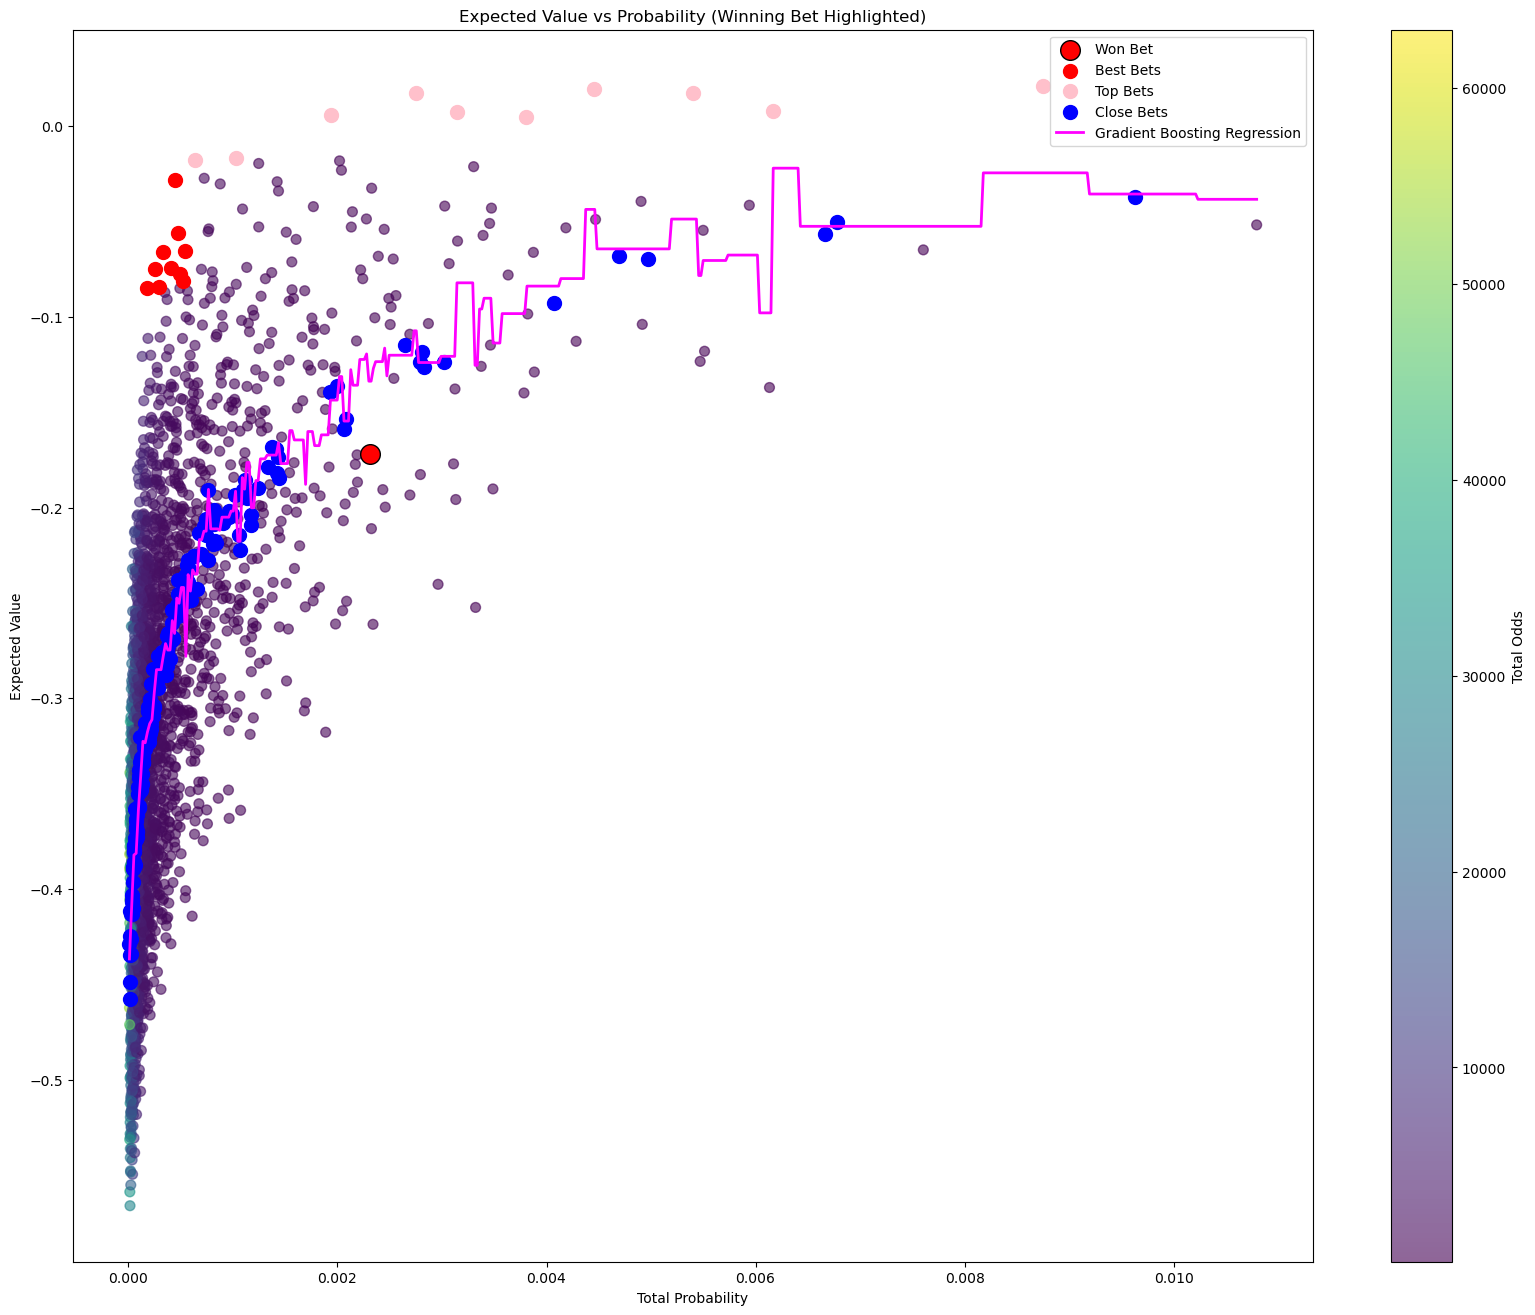

In [233]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Assuming 'df' is the DataFrame with your data
# Assuming 'won_bet' is the DataFrame or Series with the winning bet data

# Define the x and y variables
x = df['Total Probability'].values
y = df['Expected Value'].values

# Assign higher weight to the winning bet (e.g., weight of 10)
weights = np.ones_like(y)
weights[df.index == won_bet.index[0]] = 10  # Increase the weight of the winning bet

# Train Gradient Boosting Regression with weighted data
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(x.reshape(-1, 1), y, sample_weight=weights)

# Predict using the Gradient Boosting model
x_new = np.linspace(x.min(), x.max(), 500)
y_gb = gb_model.predict(x_new.reshape(-1, 1))

# Calculate the distance from the regression line for each bet
y_pred = gb_model.predict(x.reshape(-1, 1))
distances = np.abs(y - y_pred)

# Define a threshold for 'closeness' (e.g., within 0.01 units of expected value)
threshold = 0.01
close_bets = df[distances < threshold]

# Output the bets that are close to the regression line
print("Bets close to the regression line:")
print(close_bets)

# Plot the existing scatter plot with all elements
plt.figure(figsize=(20, 16))
plt.scatter(df['Total Probability'], df['Expected Value'], c=df['Total Odds'], cmap='viridis', s=50, alpha=0.6)
plt.colorbar(label='Total Odds')
plt.xlabel('Total Probability')
plt.ylabel('Expected Value')
plt.title('Expected Value vs Probability (Winning Bet Highlighted)')

# Highlight the winning bet
plt.scatter(won_bet['Total Probability'], won_bet['Expected Value'], color='red', s=200, edgecolor='black', label='Won Bet')

# Plot the "Best Bets" and "Top Bets" as before
plt.scatter(top_bets_based_on_criteria['Total Probability'], top_bets_based_on_criteria['Expected Value'], 
            color='red', s=100, label='Best Bets')
plt.scatter(top_bets['Total Probability'], top_bets['Expected Value'], color='pink', s=100, label='Top Bets')

# Highlight bets close to the regression line
plt.scatter(close_bets['Total Probability'], close_bets['Expected Value'], color='blue', s=100, label='Close Bets')

# Plot the Gradient Boosting Regression curve
plt.plot(x_new, y_gb, color='magenta', linewidth=2, label="Gradient Boosting Regression")

# Show the legend and plot
plt.legend()
plt.savefig('/Users/user/Downloads/expected_value_vs_probability_with_gradient_boosting_and_close_bets.jpeg')
plt.show()


In [239]:
close_bets


,Combination,Total Probability,Total Odds,Expected Value,is_winning_bet
0,"(win, win, win, win, win, win, win)",0.009627,98.996458,-0.037297,False
5,"(win, win, win, win, win, draw, loss)",0.001174,672.924249,-0.208996,False
13,"(win, win, win, win, draw, draw, draw)",0.000629,1231.121303,-0.225263,False
14,"(win, win, win, win, draw, draw, loss)",0.000466,1597.130338,-0.255646,False
20,"(win, win, win, win, loss, win, loss)",0.000692,1119.809109,-0.224407,False
...,...,...,...,...,...
2157,"(loss, loss, loss, draw, loss, loss, win)",0.000037,16163.210700,-0.405700,False
2164,"(loss, loss, loss, loss, win, draw, draw)",0.000119,5620.337093,-0.331337,False
2165,"(loss, loss, loss, loss, win, draw, loss)",0.000088,7291.248120,-0.357467,False
2168,"(loss, loss, loss, loss, win, loss, loss)",0.000059,10670.119200,-0.373166,False
